## Support Vector Regressor Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[ 1.83520842,  0.96677305],
       [-1.01939081, -0.19018182],
       [-1.16927481,  1.95959601],
       ...,
       [ 0.79943112, -0.60825828],
       [ 0.75396352,  0.64172588],
       [ 0.38219784, -0.75915027]])

In [5]:
y

array([ 1.29525846e+02, -7.28838527e+01, -5.78680180e+01, -3.55414970e+01,
       -2.32373713e+01,  5.50843209e+00,  9.18717421e+01, -9.82144401e+01,
        2.77947609e+01,  1.22867551e+02, -5.60667533e+01,  8.40940404e+00,
       -4.12698582e+01, -6.25680733e+01, -8.69824259e+00,  2.66238214e+01,
       -2.97007965e+01,  7.81770710e+01,  2.05372000e+01,  6.73712638e+01,
       -3.03317853e+00, -1.28293900e+02,  3.03518378e+01, -6.46308282e+01,
        3.53520175e+01, -5.10716765e+01, -2.21889563e+01,  6.44193046e+01,
       -2.39866074e+01,  2.05921248e+01,  6.45331045e+01,  8.07117785e+01,
        1.14231487e+02,  4.69477175e+01, -6.09378834e+01, -1.23150810e+02,
       -7.51561774e+01,  3.25187038e+01,  8.37323428e+01, -4.14679525e+01,
       -2.66645711e+01,  7.53799078e+01, -6.95232650e+01, -8.62106733e+01,
        9.04321541e+01, -2.27262100e+01, -9.30473467e+01,  4.74536297e+01,
       -1.02087981e+01,  1.00545884e+02, -4.67838371e+00,  9.99889953e+00,
        1.34230171e+01,  

In [6]:
pd.DataFrame(X)[0]

0      1.835208
1     -1.019391
2     -1.169275
3     -0.640764
4     -0.257219
         ...   
995   -1.399102
996   -0.117197
997    0.799431
998    0.753964
999    0.382198
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

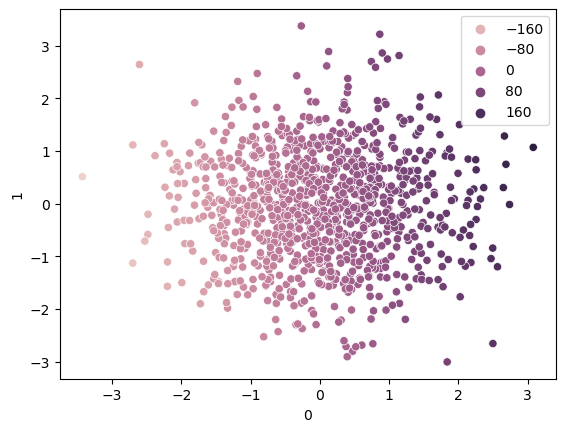

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVR

In [10]:
svr=SVR(kernel='linear')

In [11]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[64.69287761,  9.41888529]])

In [13]:
## Prediction
y_pred=svr.predict(X_test)

In [14]:
y_pred

array([  48.4446936 ,  -34.03586683,   81.3478704 ,   93.34180689,
        136.99424133,  -44.5847135 ,   -7.32157613,  -68.50869738,
          4.07175768,  -31.00179068,  -19.81538031,   35.13264917,
         -9.05658601,   27.49757864,   15.97584576,   -0.81036364,
         24.64051265,    5.77900602,   -6.09145122,  -68.50847105,
         32.23171625,   -4.944279  ,   82.13901799,  -53.17150935,
        -12.67560021,  -27.51744694,   38.93962404,   84.63654661,
         22.07383231,    5.00607612,  -17.4383327 ,   46.28680332,
         33.12712201,  109.09928433,  -83.68729764,   38.13094671,
         14.14984495,    8.93761617,  -78.09006038,   86.55241935,
        -33.12434154,  111.20949928,  -11.67314189,  -36.58602859,
       -157.00004283,  -33.18923328,  -22.18868328,   93.59529055,
         39.0672689 ,   31.238087  ,   64.22305084,  -47.10938083,
        -74.69505895,   -1.28545157,   56.51706038,  -35.58141022,
         -4.46517959,  -29.29240111,   60.58025638,   31.30363

In [15]:
from sklearn.metrics import r2_score

In [16]:
print(r2_score(y_test,y_pred))

0.9974810416335287


## Hyperparametere Tuning With SVR

In [17]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [18]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [19]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.944 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.927 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.942 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.923 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.929 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.944 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.927 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.942 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.923 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.929 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 1000, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [21]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9974914672758418
